In [65]:
import sys
import numpy as np
import netCDF4 as nc
import cmocean as cm
import matplotlib.pyplot as plt
import pickle
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)
sys.path.append('/data/tjarniko/mocsy')
import mocsy
import arrow
import gsw
import glob
sys.path.append('/data/tjarniko/MEOPAR/tools/SalishSeaTools/salishsea_tools/')

import river_201702 as rv

### Nearshore plots

##### What is the influence of a changing river cycle on near-shore carbonate chemistry and ocean acidification metrics?


In [76]:
def wshed_plot(surfdat_1,tit1,t_cmap,xsize,ysize,v_min1,v_max1,cl1,bigtit):
    "TESTED"

    fig, ax = plt.subplots(1, 1, figsize=(xsize, ysize), sharey=True)
    cmap = t_cmap
            

    tplt = np.ma.masked_values(surfdat_1,0)
    ax.set_title(tit1,fontsize = 20 )
    v_min = v_min1
    v_max = v_max1
    clabel = cl1

    viz_tools.set_aspect(ax)
    mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=v_min, vmax=v_max) 
    ax.set_xlabel('x Index', fontsize = 20 )
    ax.set_ylabel('y Index', fontsize = 20 )
    

    watersheds = rv.prop_dict.keys()
    #watershed counter
    wc = 0
    tr = 0
    wsl = ['howe', 'jdf', 'puget', 'skagit', 'fraser', 'evi_n', 'jervis', 'toba', 'bute', 'evi_s']
    for watshed in watersheds:
        #print(watshed)
        rivs = rv.prop_dict[watshed].keys()
        #river counter for index
        rc = 0
        for riv in rivs:

            ti = rv.prop_dict[watshed][riv]['i']
            tj = rv.prop_dict[watshed][riv]['j']
            if rc==0: 
                pts = ax.scatter(tj,ti,s=30,c=cols[wc],label = wsl[wc],marker='o')
                #ax.text(tj+5,ti,riv, weight = 'bold', fontsize = 10)
            else:
                pts = ax.scatter(tj,ti,s=30,c=cols[wc],marker='o')
            
            samprivs = ['SanJuan', 'Skagit1', 'Puyallup', 'Nanaimo1', 'Homathko', 'Toba', 'Squamish', 'Englishman'] #samprivs = []
            if riv in samprivs:
                ax.text(tj+5,ti,riv, weight = 'bold', fontsize = 14)

            rc = rc+1
            tr = tr+1
        wc = wc+1

    plt.xlim([0,398])
    plt.ylim([0,898])
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    cmap.set_bad('lightslategray')
    plt.legend(bbox_to_anchor=(1.29, 0.95))
    plt.suptitle(bigtit,fontsize=20)

In [77]:

watersheds = rv.prop_dict.keys()
riv_i = []
riv_j = []
riv_shed = []
riv_name = []
i = 0
for watshed in watersheds:
    #print('~~')
    rivs = rv.prop_dict[watshed].keys()
    for riv in rivs:
        #print('Riv: '+riv+', watershed: '+watshed)
        #swap is, js here
        ti = rv.prop_dict[watshed][riv]['j']
        tj = rv.prop_dict[watshed][riv]['i']
        riv_i.append(ti)
        riv_j.append(tj)
        riv_shed.append(watshed)
        riv_name.append(riv)
        i = i+1


gauge_riv = ['Squamish','SanJuan','Elwha','DungenessMatriotti','Hoko','LittleBigQuilcene',\
            'Duckabush','Skokomish','DeerJohnsGoldboroughMill','Deschutes','Chambers',\
            'Chambers','NisquallyMcAllister','Puyallup','CedarSammamish','Skagit1',\
            'Samish','Stillaguamish1','SnohomishAllenQuilceda','Tulalip','Mission',\
            'Nooksack','Fraser','Oyster','Qunisam','SalmonSayward','Theodosia',
             'Homathko','Cowichan1','Chemanius1','Nanaimo1','Englishman',
             'LittleQualicum','Puntledge']

cols = ['darkgray','red','powderblue','tan','orange',\
    'navy','palegreen','mediumaquamarine','dodgerblue','violet']
watersheds = ['howe', 'jdf', 'puget', 'skagit', 'fraser', 'evi_n', 'jervis', 'toba', 'bute', 'evi_s']

# Rivers in the SKOG model

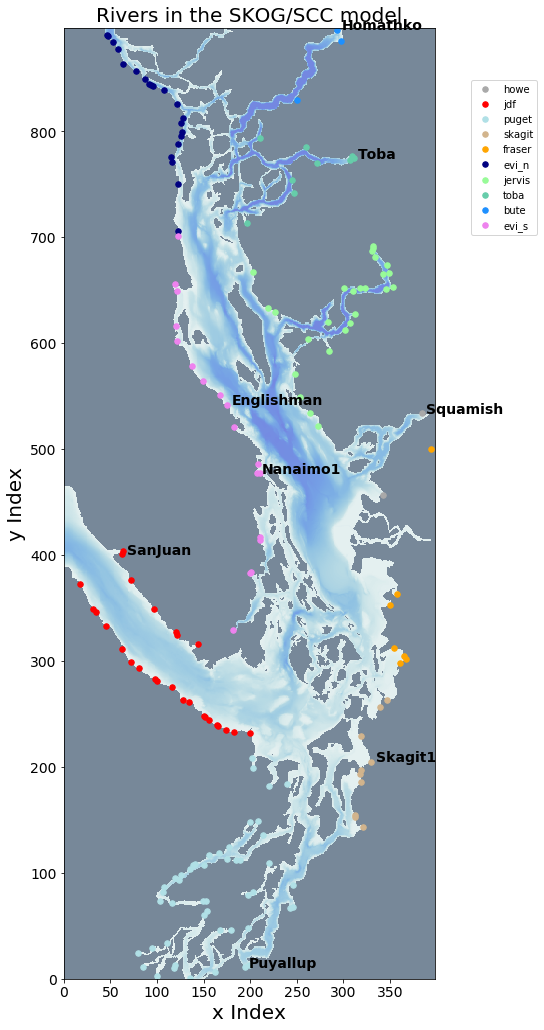

In [78]:
fact = 0.7
bath = nc.Dataset('/home/sallen/MEOPAR/grid/bathymetry_201702.nc')
bath1 = bath.variables['Bathymetry']
wshed_plot(bath1,'Rivers in the SKOG/SCC model', \
               cm.cm.dense,15*fact,25*fact,0,1000,'bathymetry','')

##### code to convert model-discharge units to m3/s for simplicity of comparison

In [79]:
daylist = [31,29,31,30,31,30,31,31,30,31,30,31]
# mons=[]
mons=np.zeros([1,12])
for i in range(1,12):
    mons[0,i]=sum(daylist[0:i])
    

mons = mons[0]


watersheds = rv.prop_dict.keys()
riv_i = []
riv_j = []
riv_shed = []
riv_name = []
i = 0
for watshed in watersheds:
    #print('~~')
    rivs = rv.prop_dict[watshed].keys()
    for riv in rivs:
        ti = rv.prop_dict[watshed][riv]['j']
        tj = rv.prop_dict[watshed][riv]['i']
        riv_i.append(ti)
        riv_j.append(tj)
        riv_shed.append(watshed)
        riv_name.append(riv)
        i = i+1
        
tdir = '/data/tjarniko/results/BASERUN_EXP/MAIN/BR_3rd_2015/ncs/'
tnc0 = 'SKOG_1d_20151127_20151231_grid_T_20151208-20151208.nc'
tnc = nc.Dataset(tdir + tnc0)
runoff_table = np.zeros([171,12])
rivdat = nc.Dataset('/data/tjarniko/MEOPAR/rivers/rivers_month_201702.nc')
t_runoff = rivdat.variables['rorunoff']
riv_runoff_mod = {}
riv_id = {}
riv_jd = {}
riv_runoff_m3 = {}

w = 90
for r in range(0,len(riv_i)):
    
    #print(riv_name[r])
    ti = riv_i[r]
    #print(ti)
    tj = riv_j[r]
    runoff = t_runoff[:,tj,ti]
    year_runoff = np.zeros([1,366])
    year_runoff = np.squeeze(year_runoff)
    runoff_table[r,:]= runoff
    #print(runoff)
    riv_id[riv_name[r]] = ti
    riv_jd[riv_name[r]] = tj
    for i in range (0,11):
        st = int((mons[i]))
        en = int((mons[i+1]))

        year_runoff[st:en] = runoff[i]
    year_runoff[int(mons[11]):366] = runoff[11]
    riv_runoff_mod[riv_name[r]] = year_runoff
#     print(runoff)
    t_area = (tnc.variables['area'][tj,ti])
    
#     print(year_runoff)
    year_runoff2 = (year_runoff / 1000) * t_area
#     print(year_runoff) 
    riv_runoff_m3[riv_name[r]] = year_runoff2

In [83]:
rv.prop_dict

{'howe': {'Squamish': {'prop': 0.9,
   'i': 534,
   'j': 384,
   'di': 1,
   'dj': 2,
   'depth': 2},
  'Burrard': {'prop': 0.1, 'i': 457, 'j': 343, 'di': 3, 'dj': 1, 'depth': 3}},
 'jdf': {'SanJuan': {'prop': 0.165,
   'i': 401,
   'j': 63,
   'di': 1,
   'dj': 1,
   'depth': 1},
  'Gordon': {'prop': 0.07, 'i': 404, 'j': 64, 'di': 1, 'dj': 1, 'depth': 1},
  'Loss': {'prop': 0.025, 'i': 376, 'j': 72, 'di': 1, 'dj': 1, 'depth': 1},
  'Jordan': {'prop': 0.025, 'i': 349, 'j': 97, 'di': 1, 'dj': 1, 'depth': 1},
  'Muir': {'prop': 0.025, 'i': 327, 'j': 120, 'di': 1, 'dj': 1, 'depth': 1},
  'Tugwell': {'prop': 0.025, 'i': 325, 'j': 121, 'di': 1, 'dj': 1, 'depth': 1},
  'Sooke': {'prop': 0.165, 'i': 316, 'j': 144, 'di': 1, 'dj': 1, 'depth': 1},
  'Elwha': {'prop': 0.15, 'i': 261, 'j': 134, 'di': 1, 'dj': 1, 'depth': 1},
  'Tumwater': {'prop': 0.003,
   'i': 248,
   'j': 151,
   'di': 1,
   'dj': 1,
   'depth': 1},
  'Valley': {'prop': 0.003, 'i': 247, 'j': 152, 'di': 1, 'dj': 1, 'depth': 1},


In [6]:
def extract_ts(start,end,vartyp,varnam,nam,rad):
    ti = riv_id[nam]
    tj = riv_jd[nam]
    start_run = arrow.get(start)
    end_run = arrow.get(end)

    arrow_array = []

    for r in arrow.Arrow.span_range('day', start_run, end_run):
        arrow_array.append(r)

    dayslen = len(arrow_array)
    #print(dayslen)
    ts = np.zeros(dayslen)
    #print(arrow_array)
    for i in range(0,dayslen):

        tdate = arrow_array[i][0]
        ymd = tdate.format('YYYYMMDD')
        tdir = '/data/tjarniko/results/BASERUN_EXP/MAIN/BR_3rd_2015/ncs/'
        guess = 'SKOG*'+vartyp+'*'+ymd+'.nc'
        w = glob.glob(tdir+guess)
        w = w[0]
        #print(w)
        if i%20 == 0:
            print(ymd)
        tnc = nc.Dataset(w)
        rivmouth = (tnc[varnam][0,0:5,tj-rad:tj+rad+1,ti-rad:ti+rad+1])
        rivmouth[rivmouth == 0] = np.nan
        ts[i] = np.nanmean(rivmouth)
    
    return ts

##### extract TS for a given river and save

In [14]:
# start ='2015-03-21'
# end ='2015-06-09'

# nam = 'Squamish'

# #gridT
# vartyp = 'grid_T'
# varnam = 'vosaline'
# rad = 3
# Squamish_sal_rad3 = extract_ts(start,end,vartyp,varnam,nam,rad)
# rad = 10
# Squamish_sal_rad10 = extract_ts(start,end,vartyp,varnam,nam,rad)

# varnam = 'votemper'
# rad = 3
# Squamish_temp_rad3 = extract_ts(start,end,vartyp,varnam,nam,rad)
# rad = 10
# Squamish_temp_rad10 = extract_ts(start,end,vartyp,varnam,nam,rad)

# vartyp = 'carp_T'
# varnam = 'dissolved_inorganic_carbon'
# rad = 3
# Squamish_DIC_rad3 = extract_ts(start,end,vartyp,varnam,nam,rad)
# rad = 10
# Squamish_DIC_rad10 = extract_ts(start,end,vartyp,varnam,nam,rad)

# varnam = 'total_alkalinity'
# rad = 3
# Squamish_TA_rad3 = extract_ts(start,end,vartyp,varnam,nam,rad)
# rad = 10
# Squamish_TA_rad10 = extract_ts(start,end,vartyp,varnam,nam,rad)
# # plt.plot(ts)

# vartyp = 'ptrc_T'
# varnam = 'diatoms'
# rad = 3
# Squamish_diat_rad3 = extract_ts(start,end,vartyp,varnam,nam,rad)
# rad = 10
# Squamish_diat_rad10 = extract_ts(start,end,vartyp,varnam,nam,rad)

# pickle.dump(Squamish_sal_rad3, open("./pkls/Squamish_sal_rad3.pkl", 'wb'))
# pickle.dump(Squamish_sal_rad10, open("./pkls/Squamish_sal_rad10.pkl", 'wb'))
# pickle.dump(Squamish_temp_rad3, open("./pkls/Squamish_temp_rad3.pkl", 'wb'))
# pickle.dump(Squamish_temp_rad10, open("./pkls/Squamish_temp_rad10.pkl", 'wb'))
# pickle.dump(Squamish_DIC_rad3, open("./pkls/Squamish_DIC_rad3.pkl", 'wb'))
# pickle.dump(Squamish_DIC_rad10, open("./pkls/Squamish_DIC_rad10.pkl", 'wb'))
# pickle.dump(Squamish_diat_rad3, open("./pkls/Squamish_diat_rad3.pkl", 'wb'))
# pickle.dump(Squamish_diat_rad10, open("./pkls/Squamish_diat_rad10.pkl", 'wb'))
# pickle.dump(Squamish_TA_rad3, open("./pkls/Squamish_TA_rad3.pkl", 'wb'))
# pickle.dump(Squamish_TA_rad10, open("./pkls/Squamish_TA_rad10.pkl", 'wb'))


In [16]:
Squamish_sal_rad3 = pickle.load(open('./pkls/Squamish_sal_rad3.pkl', 'rb'))  
Squamish_sal_rad10 = pickle.load(open('./pkls/Squamish_sal_rad10.pkl', 'rb'))  
Squamish_temp_rad3 = pickle.load(open('./pkls/Squamish_temp_rad3.pkl', 'rb'))  
Squamish_temp_rad10 = pickle.load(open('./pkls/Squamish_temp_rad10.pkl', 'rb'))  
Squamish_diat_rad3 = pickle.load(open('./pkls/Squamish_diat_rad3.pkl', 'rb'))  
Squamish_diat_rad10 = pickle.load(open('./pkls/Squamish_diat_rad10.pkl', 'rb'))  
Squamish_TA_rad3 = pickle.load(open('./pkls/Squamish_TA_rad3.pkl', 'rb'))  
Squamish_TA_rad10 = pickle.load(open('./pkls/Squamish_TA_rad10.pkl', 'rb'))  
Squamish_DIC_rad3 = pickle.load(open('./pkls/Squamish_DIC_rad3.pkl', 'rb'))  
Squamish_DIC_rad10 = pickle.load(open('./pkls/Squamish_DIC_rad10.pkl', 'rb'))  

In [90]:
def make_diag_plot(rivnam, sd, ed, radloc, radbroad, rivfact,
                   sal_loc, sal_broad, 
                   temp_loc, temp_broad,
                   diat_loc, diat_broad, 
                   DIC_loc, DIC_broad, 
                   TA_loc, TA_broad
                  ):
    fs = 14
    fact = 0.65
    fig = plt.figure(figsize=(22*fact,14*fact))
    for i in range(1,7):
        ax = fig.add_subplot(3,2,i)
        
        #river cycle 
        if i == 1:
            ax.plot(np.arange(1,367,1),riv_runoff_m3[rivnam]*rivfact,'k-')
            ax.set_xlim([0,366])
            ax.axvline(x=sd, color = 'red', lw = 3)
            ax.axvline(x=ed, color = 'red', lw = 3)
            ax.set_title('Runoff by DOY, river: '+rivnam +'\n (time of interest highlighted)', fontsize = fs)
            ax.set_ylabel('m$^3$s$^{-1}$')
            ax.set_xlabel('day of year')
        
        #salinity
        if i == 3:
            ax.plot(np.arange(sd,ed+1,1),sal_loc,'k-', label = 'radius = '+str(radloc) +' cells \n from rivermouth')
            ax.plot(np.arange(sd,ed+1,1),sal_broad,'k:', label = 'radius = '+str(radbroad) +' cells \n from rivermouth')
            ax.set_xlim([sd,ed])
            plt.legend(loc = 'best')
            ax.set_ylabel('salinity g/kg')
            ax.set_xlabel('day of year')
            ax.set_title('Salinity', fontsize = fs)
        plt.tight_layout()
        
        if i == 5:
            ax.plot(np.arange(sd,ed+1,1),diat_loc,'k-', label = 'radius = '+str(radloc) +' cells \n from rivermouth')
            ax.plot(np.arange(sd,ed+1,1),diat_broad,'k:', label = 'radius = '+str(radbroad) +' cells \n from rivermouth')
            ax.set_xlim([sd,ed])
            ax.set_ylabel('diatoms  mmol N m$^{-3}$')
            ax.set_xlabel('day of year')
            ax.set_title('Primary Productivity (diatoms)', fontsize = fs)
        plt.tight_layout()
        
        if i == 2:
            ax.plot(np.arange(sd,ed+1,1),DIC_loc,'k-', label = 'radius = '+str(radloc) +' cells \n from rivermouth')
            ax.plot(np.arange(sd,ed+1,1),DIC_broad,'k:', label = 'radius = '+str(radbroad) +' cells \n from rivermouth')
            ax.set_xlim([sd,ed])
            ax.set_ylabel('DIC  mmol m$^{-3}$')
            ax.set_xlabel('day of year')
            ax.set_title('DIC', fontsize = fs)
        plt.tight_layout()
        
        ##nX = Xobs × 35/Sobs,
        if i == 4:
            ax.plot(np.arange(sd,ed+1,1),DIC_loc *30/sal_loc,'k-', label = 'radius = '+str(radloc) +' cells \n from rivermouth')
            ax.plot(np.arange(sd,ed+1,1),DIC_broad *30/sal_broad,'k:', label = 'radius = '+str(radbroad) +' cells \n from rivermouth')
            ax.set_xlim([sd,ed])
            ax.set_ylabel('nDIC (to 30g/kg)  mmol m$^{-3}$')
            ax.set_xlabel('day of year')
            ax.set_title('nDIC to 30g/kg', fontsize = fs)
        plt.tight_layout()
        
        if i == 6:
            tsra = np.ravel(sal_loc)
            ttera = np.ravel(temp_loc)
            ttara = np.ravel(TA_loc) * 1e-3
            tdra = np.ravel(DIC_loc) * 1e-3
            tzero = np.zeros_like(tsra)
            tpressure = np.zeros_like(tsra)
            tpressure[:] =1

            tsra_psu = tsra*35/35.16504
            ttera_is = gsw.t_from_CT(tsra,ttera,tzero)

            response_tup = mocsy.mvars(temp=ttera_is, sal=tsra_psu, alk=ttara, dic=tdra, 
                               sil=tzero, phos=tzero, patm=tpressure, depth=tzero, lat=tzero, 
                                optcon='mol/m3', optt='Tinsitu', optp='m',
                                optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
            pH,pco2,fco2,co2,hco3,co3,OmegaA_loc,OmegaC,BetaD,DENis,p,Tis = response_tup

            tsra = np.ravel(sal_broad)
            ttera = np.ravel(temp_broad)
            ttara = np.ravel(TA_broad) * 1e-3
            tdra = np.ravel(DIC_broad) * 1e-3
            tzero = np.zeros_like(tsra)
            tpressure = np.zeros_like(tsra)
            tpressure[:] =1

            tsra_psu = tsra*35/35.16504
            ttera_is = gsw.t_from_CT(tsra,ttera,tzero)

            response_tup = mocsy.mvars(temp=ttera_is, sal=tsra_psu, alk=ttara, dic=tdra, 
                               sil=tzero, phos=tzero, patm=tpressure, depth=tzero, lat=tzero, 
                                optcon='mol/m3', optt='Tinsitu', optp='m',
                                optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
            pH,pco2,fco2,co2,hco3,co3,OmegaA_broad,OmegaC,BetaD,DENis,p,Tis = response_tup

            ax.plot(np.arange(sd,ed+1,1),OmegaA_loc,'k-', label = 'radius = '+str(radloc) +' cells \n from rivermouth')
            ax.plot(np.arange(sd,ed+1,1),OmegaA_broad,'k:', label = 'radius = '+str(radloc) +' cells \n from rivermouth')

            ax.set_xlim([sd,ed])
            ax.set_ylabel('$\Omega_A$')
            ax.set_title('$\Omega_A$', fontsize = fs)
            plt.axhline(y=1, color = 'r')
    return



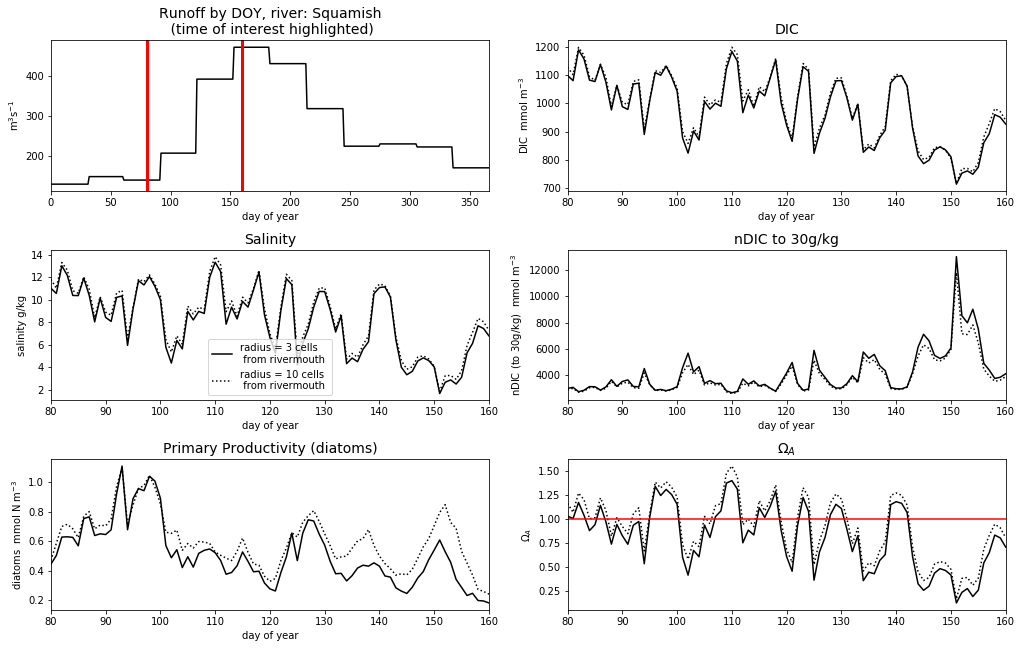

In [86]:
make_diag_plot('Squamish',80,160, 3, 10, 4,
              Squamish_sal_rad3, Squamish_sal_rad10,
              Squamish_temp_rad3, Squamish_temp_rad10,
              Squamish_diat_rad3, Squamish_diat_rad10,
              Squamish_DIC_rad3, Squamish_DIC_rad10,
              Squamish_TA_rad3, Squamish_TA_rad10)

In [87]:
# start ='2015-03-21'
# end ='2015-06-09'

# nam = 'SanJuan'

# #gridT
# vartyp = 'grid_T'
# varnam = 'vosaline'
# rad = 3
# SanJuan_sal_rad3 = extract_ts(start,end,vartyp,varnam,nam,rad)
# rad = 10
# SanJuan_sal_rad10 = extract_ts(start,end,vartyp,varnam,nam,rad)

# varnam = 'votemper'
# rad = 3
# SanJuan_temp_rad3 = extract_ts(start,end,vartyp,varnam,nam,rad)
# rad = 10
# SanJuan_temp_rad10 = extract_ts(start,end,vartyp,varnam,nam,rad)

# vartyp = 'carp_T'
# varnam = 'dissolved_inorganic_carbon'
# rad = 3
# SanJuan_DIC_rad3 = extract_ts(start,end,vartyp,varnam,nam,rad)
# rad = 10
# SanJuan_DIC_rad10 = extract_ts(start,end,vartyp,varnam,nam,rad)

# varnam = 'total_alkalinity'
# rad = 3
# SanJuan_TA_rad3 = extract_ts(start,end,vartyp,varnam,nam,rad)
# rad = 10
# SanJuan_TA_rad10 = extract_ts(start,end,vartyp,varnam,nam,rad)
# # plt.plot(ts)

# vartyp = 'ptrc_T'
# varnam = 'diatoms'
# rad = 3
# SanJuan_diat_rad3 = extract_ts(start,end,vartyp,varnam,nam,rad)
# rad = 10
# SanJuan_diat_rad10 = extract_ts(start,end,vartyp,varnam,nam,rad)

# pickle.dump(SanJuan_sal_rad3, open("./pkls/SanJuan_sal_rad3.pkl", 'wb'))
# pickle.dump(SanJuan_sal_rad10, open("./pkls/SanJuan_sal_rad10.pkl", 'wb'))
# pickle.dump(SanJuan_temp_rad3, open("./pkls/SanJuan_temp_rad3.pkl", 'wb'))
# pickle.dump(SanJuan_temp_rad10, open("./pkls/SanJuan_temp_rad10.pkl", 'wb'))
# pickle.dump(SanJuan_DIC_rad3, open("./pkls/SanJuan_DIC_rad3.pkl", 'wb'))
# pickle.dump(SanJuan_DIC_rad10, open("./pkls/SanJuan_DIC_rad10.pkl", 'wb'))
# pickle.dump(SanJuan_diat_rad3, open("./pkls/SanJuan_diat_rad3.pkl", 'wb'))
# pickle.dump(SanJuan_diat_rad10, open("./pkls/SanJuan_diat_rad10.pkl", 'wb'))
# pickle.dump(SanJuan_TA_rad3, open("./pkls/SanJuan_TA_rad3.pkl", 'wb'))
# pickle.dump(SanJuan_TA_rad10, open("./pkls/SanJuan_TA_rad10.pkl", 'wb'))


In [88]:
SanJuan_sal_rad3 = pickle.load(open('./pkls/SanJuan_sal_rad3.pkl', 'rb'))  
SanJuan_sal_rad10 = pickle.load(open('./pkls/SanJuan_sal_rad10.pkl', 'rb'))  
SanJuan_temp_rad3 = pickle.load(open('./pkls/SanJuan_temp_rad3.pkl', 'rb'))  
SanJuan_temp_rad10 = pickle.load(open('./pkls/SanJuan_temp_rad10.pkl', 'rb'))  
SanJuan_diat_rad3 = pickle.load(open('./pkls/SanJuan_diat_rad3.pkl', 'rb'))  
SanJuan_diat_rad10 = pickle.load(open('./pkls/SanJuan_diat_rad10.pkl', 'rb'))  
SanJuan_TA_rad3 = pickle.load(open('./pkls/SanJuan_TA_rad3.pkl', 'rb'))  
SanJuan_TA_rad10 = pickle.load(open('./pkls/SanJuan_TA_rad10.pkl', 'rb'))  
SanJuan_DIC_rad3 = pickle.load(open('./pkls/SanJuan_DIC_rad3.pkl', 'rb'))  
SanJuan_DIC_rad10 = pickle.load(open('./pkls/SanJuan_DIC_rad10.pkl', 'rb'))  

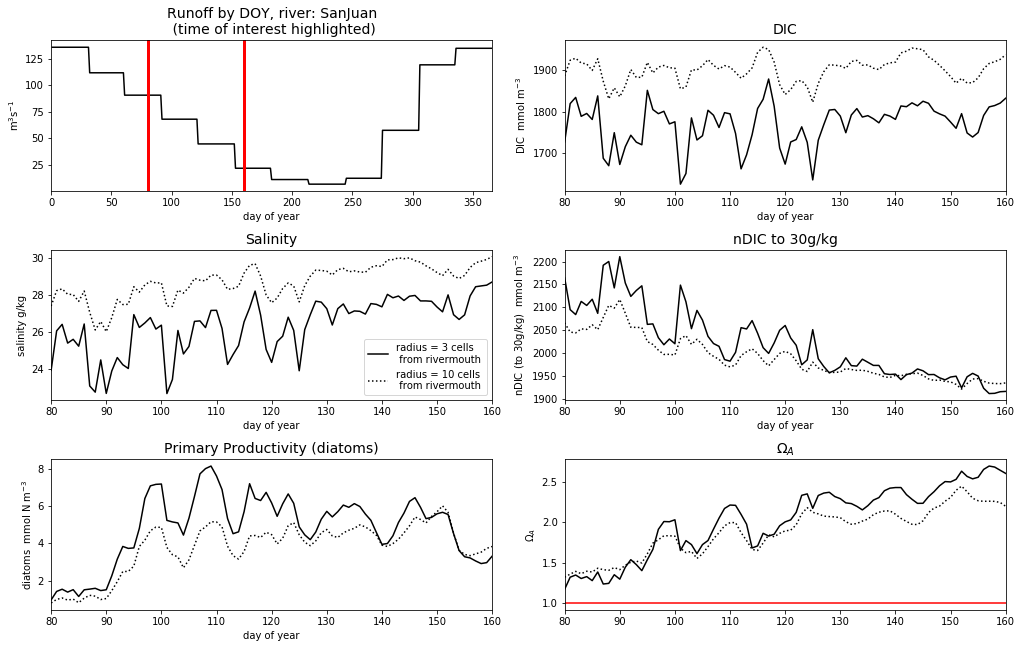

In [89]:
make_diag_plot('SanJuan',80,160, 3, 10, 1,
              SanJuan_sal_rad3, SanJuan_sal_rad10,
              SanJuan_temp_rad3, SanJuan_temp_rad10,
              SanJuan_diat_rad3, SanJuan_diat_rad10,
              SanJuan_DIC_rad3, SanJuan_DIC_rad10,
              SanJuan_TA_rad3, SanJuan_TA_rad10)

In [91]:
start ='2015-03-21'
end ='2015-06-09'

nam = 'Homathko'

#gridT
vartyp = 'grid_T'
varnam = 'vosaline'
rad = 3
Homathko_sal_rad3 = extract_ts(start,end,vartyp,varnam,nam,rad)
rad = 10
Homathko_sal_rad10 = extract_ts(start,end,vartyp,varnam,nam,rad)

varnam = 'votemper'
rad = 3
Homathko_temp_rad3 = extract_ts(start,end,vartyp,varnam,nam,rad)
rad = 10
Homathko_temp_rad10 = extract_ts(start,end,vartyp,varnam,nam,rad)

vartyp = 'carp_T'
varnam = 'dissolved_inorganic_carbon'
rad = 3
Homathko_DIC_rad3 = extract_ts(start,end,vartyp,varnam,nam,rad)
rad = 10
Homathko_DIC_rad10 = extract_ts(start,end,vartyp,varnam,nam,rad)

varnam = 'total_alkalinity'
rad = 3
Homathko_TA_rad3 = extract_ts(start,end,vartyp,varnam,nam,rad)
rad = 10
Homathko_TA_rad10 = extract_ts(start,end,vartyp,varnam,nam,rad)
# plt.plot(ts)

vartyp = 'ptrc_T'
varnam = 'diatoms'
rad = 3
Homathko_diat_rad3 = extract_ts(start,end,vartyp,varnam,nam,rad)
rad = 10
Homathko_diat_rad10 = extract_ts(start,end,vartyp,varnam,nam,rad)

pickle.dump(Homathko_sal_rad3, open("./pkls/Homathko_sal_rad3.pkl", 'wb'))
pickle.dump(Homathko_sal_rad10, open("./pkls/Homathko_sal_rad10.pkl", 'wb'))
pickle.dump(Homathko_temp_rad3, open("./pkls/Homathko_temp_rad3.pkl", 'wb'))
pickle.dump(Homathko_temp_rad10, open("./pkls/Homathko_temp_rad10.pkl", 'wb'))
pickle.dump(Homathko_DIC_rad3, open("./pkls/Homathko_DIC_rad3.pkl", 'wb'))
pickle.dump(Homathko_DIC_rad10, open("./pkls/Homathko_DIC_rad10.pkl", 'wb'))
pickle.dump(Homathko_diat_rad3, open("./pkls/Homathko_diat_rad3.pkl", 'wb'))
pickle.dump(Homathko_diat_rad10, open("./pkls/Homathko_diat_rad10.pkl", 'wb'))
pickle.dump(Homathko_TA_rad3, open("./pkls/Homathko_TA_rad3.pkl", 'wb'))
pickle.dump(Homathko_TA_rad10, open("./pkls/Homathko_TA_rad10.pkl", 'wb'))


20150321
20150410
20150430
20150520
20150609
20150321
20150410
20150430
20150520
20150609
20150321
20150410
20150430
20150520
20150609
20150321
20150410
20150430
20150520
20150609
20150321
20150410
20150430
20150520
20150609
20150321
20150410
20150430
20150520
20150609
20150321
20150410
20150430
20150520
20150609
20150321
20150410
20150430
20150520
20150609
20150321
20150410
20150430
20150520
20150609
20150321
20150410
20150430
20150520
20150609


In [92]:
Homathko_sal_rad3 = pickle.load(open('./pkls/Homathko_sal_rad3.pkl', 'rb'))  
Homathko_sal_rad10 = pickle.load(open('./pkls/Homathko_sal_rad10.pkl', 'rb'))  
Homathko_temp_rad3 = pickle.load(open('./pkls/Homathko_temp_rad3.pkl', 'rb'))  
Homathko_temp_rad10 = pickle.load(open('./pkls/Homathko_temp_rad10.pkl', 'rb'))  
Homathko_diat_rad3 = pickle.load(open('./pkls/Homathko_diat_rad3.pkl', 'rb'))  
Homathko_diat_rad10 = pickle.load(open('./pkls/Homathko_diat_rad10.pkl', 'rb'))  
Homathko_TA_rad3 = pickle.load(open('./pkls/Homathko_TA_rad3.pkl', 'rb'))  
Homathko_TA_rad10 = pickle.load(open('./pkls/Homathko_TA_rad10.pkl', 'rb'))  
Homathko_DIC_rad3 = pickle.load(open('./pkls/Homathko_DIC_rad3.pkl', 'rb'))  
Homathko_DIC_rad10 = pickle.load(open('./pkls/Homathko_DIC_rad10.pkl', 'rb'))  

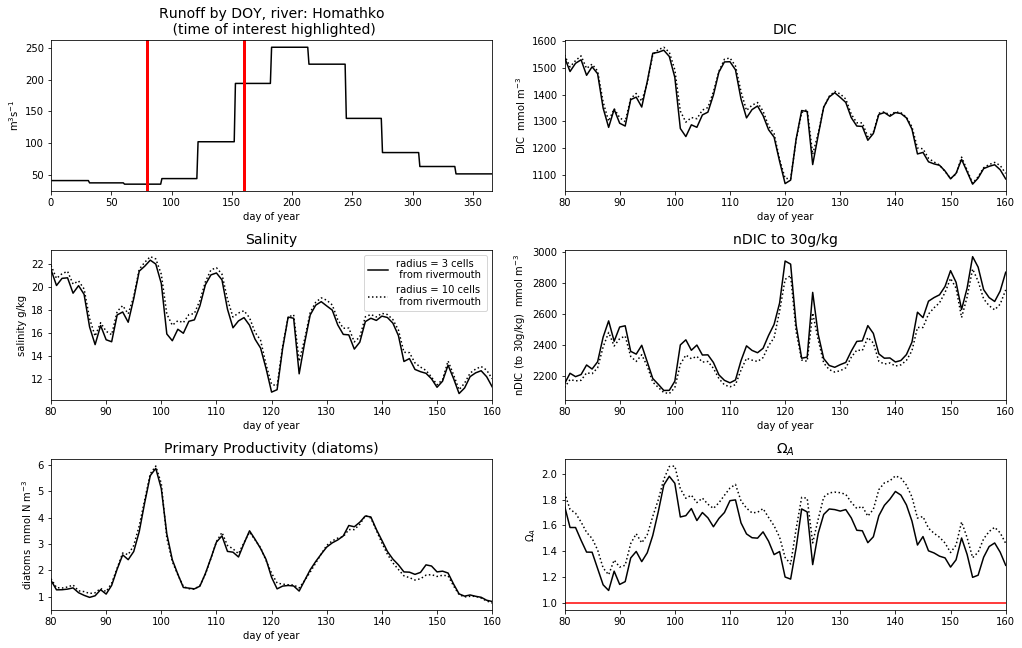

In [93]:
make_diag_plot('Homathko',80,160, 3, 10, 1,
              Homathko_sal_rad3, Homathko_sal_rad10,
              Homathko_temp_rad3, Homathko_temp_rad10,
              Homathko_diat_rad3, Homathko_diat_rad10,
              Homathko_DIC_rad3, Homathko_DIC_rad10,
              Homathko_TA_rad3, Homathko_TA_rad10)

In [94]:
start ='2015-03-21'
end ='2015-06-09'

nam = 'Nanaimo1'

#gridT
vartyp = 'grid_T'
varnam = 'vosaline'
rad = 3
Nanaimo1_sal_rad3 = extract_ts(start,end,vartyp,varnam,nam,rad)
rad = 10
Nanaimo1_sal_rad10 = extract_ts(start,end,vartyp,varnam,nam,rad)

varnam = 'votemper'
rad = 3
Nanaimo1_temp_rad3 = extract_ts(start,end,vartyp,varnam,nam,rad)
rad = 10
Nanaimo1_temp_rad10 = extract_ts(start,end,vartyp,varnam,nam,rad)

vartyp = 'carp_T'
varnam = 'dissolved_inorganic_carbon'
rad = 3
Nanaimo1_DIC_rad3 = extract_ts(start,end,vartyp,varnam,nam,rad)
rad = 10
Nanaimo1_DIC_rad10 = extract_ts(start,end,vartyp,varnam,nam,rad)

varnam = 'total_alkalinity'
rad = 3
Nanaimo1_TA_rad3 = extract_ts(start,end,vartyp,varnam,nam,rad)
rad = 10
Nanaimo1_TA_rad10 = extract_ts(start,end,vartyp,varnam,nam,rad)
# plt.plot(ts)

vartyp = 'ptrc_T'
varnam = 'diatoms'
rad = 3
Nanaimo1_diat_rad3 = extract_ts(start,end,vartyp,varnam,nam,rad)
rad = 10
Nanaimo1_diat_rad10 = extract_ts(start,end,vartyp,varnam,nam,rad)

pickle.dump(Nanaimo1_sal_rad3, open("./pkls/Nanaimo1_sal_rad3.pkl", 'wb'))
pickle.dump(Nanaimo1_sal_rad10, open("./pkls/Nanaimo1_sal_rad10.pkl", 'wb'))
pickle.dump(Nanaimo1_temp_rad3, open("./pkls/Nanaimo1_temp_rad3.pkl", 'wb'))
pickle.dump(Nanaimo1_temp_rad10, open("./pkls/Nanaimo1_temp_rad10.pkl", 'wb'))
pickle.dump(Nanaimo1_DIC_rad3, open("./pkls/Nanaimo1_DIC_rad3.pkl", 'wb'))
pickle.dump(Nanaimo1_DIC_rad10, open("./pkls/Nanaimo1_DIC_rad10.pkl", 'wb'))
pickle.dump(Nanaimo1_diat_rad3, open("./pkls/Nanaimo1_diat_rad3.pkl", 'wb'))
pickle.dump(Nanaimo1_diat_rad10, open("./pkls/Nanaimo1_diat_rad10.pkl", 'wb'))
pickle.dump(Nanaimo1_TA_rad3, open("./pkls/Nanaimo1_TA_rad3.pkl", 'wb'))
pickle.dump(Nanaimo1_TA_rad10, open("./pkls/Nanaimo1_TA_rad10.pkl", 'wb'))


20150321
20150410
20150430
20150520
20150609
20150321
20150410
20150430
20150520
20150609
20150321
20150410
20150430
20150520
20150609
20150321
20150410
20150430
20150520
20150609
20150321
20150410
20150430
20150520
20150609
20150321
20150410
20150430
20150520
20150609
20150321
20150410
20150430
20150520
20150609
20150321
20150410
20150430
20150520
20150609
20150321
20150410
20150430
20150520
20150609
20150321
20150410
20150430
20150520
20150609


In [95]:
Nanaimo1_sal_rad3 = pickle.load(open('./pkls/Nanaimo1_sal_rad3.pkl', 'rb'))  
Nanaimo1_sal_rad10 = pickle.load(open('./pkls/Nanaimo1_sal_rad10.pkl', 'rb'))  
Nanaimo1_temp_rad3 = pickle.load(open('./pkls/Nanaimo1_temp_rad3.pkl', 'rb'))  
Nanaimo1_temp_rad10 = pickle.load(open('./pkls/Nanaimo1_temp_rad10.pkl', 'rb'))  
Nanaimo1_diat_rad3 = pickle.load(open('./pkls/Nanaimo1_diat_rad3.pkl', 'rb'))  
Nanaimo1_diat_rad10 = pickle.load(open('./pkls/Nanaimo1_diat_rad10.pkl', 'rb'))  
Nanaimo1_TA_rad3 = pickle.load(open('./pkls/Nanaimo1_TA_rad3.pkl', 'rb'))  
Nanaimo1_TA_rad10 = pickle.load(open('./pkls/Nanaimo1_TA_rad10.pkl', 'rb'))  
Nanaimo1_DIC_rad3 = pickle.load(open('./pkls/Nanaimo1_DIC_rad3.pkl', 'rb'))  
Nanaimo1_DIC_rad10 = pickle.load(open('./pkls/Nanaimo1_DIC_rad10.pkl', 'rb'))  

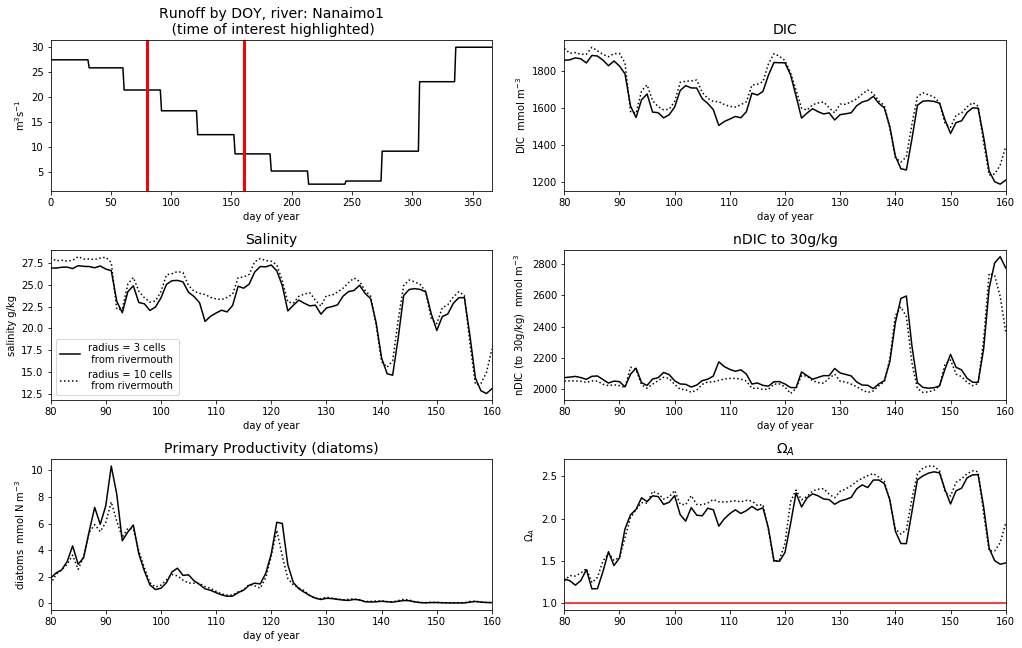

In [96]:
make_diag_plot('Nanaimo1',80,160, 3, 10, 1,
              Nanaimo1_sal_rad3, Nanaimo1_sal_rad10,
              Nanaimo1_temp_rad3, Nanaimo1_temp_rad10,
              Nanaimo1_diat_rad3, Nanaimo1_diat_rad10,
              Nanaimo1_DIC_rad3, Nanaimo1_DIC_rad10,
              Nanaimo1_TA_rad3, Nanaimo1_TA_rad10)